### Namespaces

A namespace is a space that holds names(identifiers).Programmatically speaking, namespaces are dictionary of identifiers(keys) and their objects(values)

There are 4 types of namespaces:
- Builtin Namespace
- Global Namespace
- Enclosing Namespace
- Local Namespace

### Scope and LEGB Rule

A scope is a textual region of a Python program where a namespace is directly accessible.

The interpreter searches for a name from the inside out, looking in the local, enclosing, global, and finally the built-in scope. If the interpreter doesn’t find the name in any of these locations, then Python raises a NameError exception.

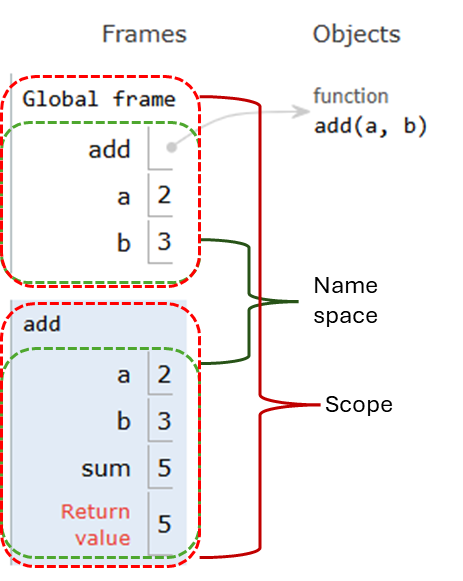

In [ ]:
# local and global


# global var(global scope)
a = 2

def temp():
  # local var (local scope, function)
  b = 3
  print(b)

temp()
print(a)

3
2


In [ ]:
# local and global -> same name

#There is two variabel in the same name, Is it make conflict?
# The answer is no, because their existing scope and namespace is different (one is local, one is global)
a = 2

def temp():
  # local var
  a = 3
  print(a)

temp()
print(a)

In [ ]:
# local and global -> local does not have but global has
a = 2

def temp():
  # local var
  print(a) # LEGB (local (not found) then enclosing(not found) then global(found))

temp()
print(a)


2
2


In [ ]:
# local and global -> editing global
a = 2

def temp():
  # local var
  a += 1   # Only you can read it but not edit it
  print(a) # Only you can read it but not edit it

temp()
print(a)

UnboundLocalError: ignored

In [ ]:
a = 2

def temp():
  # local var
  global a  # Do it by using global
  print(a)

temp()
print(a)

3
3


In [ ]:
# local and global -> global created inside local
def temp():
  # local var
  global a # You can create global variable inside local
  a = 1
  print(a)

temp()
print(a)

In [ ]:
# local and global -> function parameter is local
def temp(z):
  # local var
  print(z)

a = 5
temp(5)
print(a)
print(z)

5
5


NameError: ignored

In [1]:
# In start of the program, python gives some variable and function, these are built-in scope
# built-in scope
import builtins
print(len(dir(builtins)),dir(builtins))

158 ['ArithmeticError', 'AssertionError', 'AttributeError', 'BaseException', 'BlockingIOError', 'BrokenPipeError', 'BufferError', 'BytesWarning', 'ChildProcessError', 'ConnectionAbortedError', 'ConnectionError', 'ConnectionRefusedError', 'ConnectionResetError', 'DeprecationWarning', 'EOFError', 'Ellipsis', 'EncodingWarning', 'EnvironmentError', 'Exception', 'False', 'FileExistsError', 'FileNotFoundError', 'FloatingPointError', 'FutureWarning', 'GeneratorExit', 'IOError', 'ImportError', 'ImportWarning', 'IndentationError', 'IndexError', 'InterruptedError', 'IsADirectoryError', 'KeyError', 'KeyboardInterrupt', 'LookupError', 'MemoryError', 'ModuleNotFoundError', 'NameError', 'None', 'NotADirectoryError', 'NotImplemented', 'NotImplementedError', 'OSError', 'OverflowError', 'PendingDeprecationWarning', 'PermissionError', 'ProcessLookupError', 'RecursionError', 'ReferenceError', 'ResourceWarning', 'RuntimeError', 'RuntimeWarning', 'StopAsyncIteration', 'StopIteration', 'SyntaxError', 'Synta

In [ ]:
# how to see all the built-ins

In [2]:
# renaming built-ins

# max() is a built-in function which gives by the python
L = [1,2,3]
print(max(L)) # LGEB (the calling function not found in local, global and enclosing. So it used the built in function)


def max(): # Create function in global namespace
  print('hello')

print(max(L)) # LGEB (the calling function not found in local but found in global.   So it used the global function)

# pls run in python tutor

TypeError: max() takes 0 positional arguments but 1 was given

In [ ]:
# Enclosing scope
def outer():
  def inner():
    print(a)
  inner()
  print('outer function')


outer()
print('main program')

1
outer function
main program


In [4]:
# nonlocal keyword

# We can acces the nonlocal variable but can't change it. If we want to change(edit) the outer function variable from
# the local/inner function then we must used 'nonlocal' keyword.
def outer():
  a = 1
  def inner():
    a=4
    def inner2():
      a=8
      def inner3():
        nonlocal a
        a += 1
        print('inner3 ',a)
      inner3()
    inner2()
  inner()
  print('outer',a)


outer()
print('main program')

inner3  9
outer 1
main program


In [ ]:
# Summary

### Decorators

A decorator in python is a function that receives another function as input and adds some functionality(decoration) to inpur function and returns it.

This can happen only because python functions are 1st class citizens.

There are 2 types of decorators available in python
- `Built in decorators` like `@staticmethod`, `@classmethod`, `@abstractmethod` and `@property` etc
- `User defined decorators` that we programmers can create according to our needs

In [ ]:
# Python are 1st class function

def modify(func,num):
  return func(num)

def square(num):
  return num**2

modify(square,2)

4

In [ ]:
# simple example

def my_decorator(func):
  def wrapper():
    print('***********************')
    func()
    print('***********************')
  return wrapper

def hello():
  print('hello')

def display():
  print('hello nitish')

a = my_decorator(hello)
a()

b = my_decorator(display)
b()

***********************
hello
***********************
***********************
hello nitish
***********************


In [28]:
# Read carefully : When ever a function is end, it's varible is over to access. But when it's return ineer function which
# used it's variable then outer variable is accessible . This called closure

# Closure: the inner function can acces the variable of outer function even if the outer function is dead

# Example, see carefully
def outer():
  a=5
  def inner():
    print(a)
  a=a+1
  return inner


k=outer()
print(k)
k()

<function outer.<locals>.inner at 0x7a75f03923b0>
6


In [ ]:
# more functions

In [ ]:
# how this works -> closure?

In [ ]:
# python tutor

In [ ]:
# Better syntax?
# simple example

def my_decorator(func):
  def wrapper():
    print('***********************')
    func()
    print('***********************')
  return wrapper

@my_decorator # Tell me which function will decorate
def hello():
  print('hello')

hello()

***********************
hello
***********************


In [32]:
# THis code is work only if there is no paramter

import time
def cal(func):
  def wrapper():
    x=time.time()
    func()
    y=time.time()
    print(y-x)
  return wrapper

@cal
def hello():
  print('hello boss')

hello()

@cal
def sleep():
  print('fucntion 2')
  time.sleep(2)
sleep()

hello boss
0.0018124580383300781
fucntion 2
2.002633571624756


In [ ]:
# anything meaningful?
import time

def timer(func):
  def wrapper(*args):
    start = time.time()
    func(*args)
    print('time taken by',func.__name__,time.time()-start,'secs')
  return wrapper

@timer
def hello():
  print('hello wolrd')
  time.sleep(2)

@timer
def square(num):
  time.sleep(1)
  print(num**2)

@timer
def power(a,b):
  print(a**b)

hello()
square(2)
power(2,3)


hello wolrd
time taken by hello 2.003671884536743 secs
4
time taken by square 1.0009939670562744 secs
8
time taken by power 2.1696090698242188e-05 secs


In [ ]:
# A big problem

In [ ]:
# One last example -> decorators with arguments


In [ ]:
@checkdt(int)
def square(num):
  print(num**2)

In [ ]:
def sanity_check(data_type):
  def outer_wrapper(func):
    def inner_wrapper(*args):
      if type(*args) == data_type:
        func(*args)
      else:
        raise TypeError('Ye datatype nai chalega')
    return inner_wrapper
  return outer_wrapper

@sanity_check(int)
def square(num):
  print(num**2)

@sanity_check(str)
def greet(name):
  print('hello',name)

square(2)

4
